In [1]:
import kagglehub

path = kagglehub.dataset_download("viditgandhi/tree-species-identification-dataset")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/tree-species-identification-dataset


Cloning into 'TreeSpeciesClassification'...
remote: Enumerating objects: 974, done.
remote: Counting objects: 100% (974/974), done.
remote: Compressing objects: 100% (963/963), done.
remote: Total 974 (delta 5), reused 974 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (974/974), 23.72 MiB | 10.40 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
import shutil

source_path = '/kaggle/input/tree-species-identification-dataset'
destination_path = '/content/tree-species-dataset'

try:
    shutil.copytree(source_path, destination_path)
    print(f"Dataset copied successfully from {source_path} to {destination_path}")
except shutil.Error as e:
    print(f"Error copying dataset: {e}")
except FileNotFoundError:
    print(f"Source directory not found: {source_path}")
except FileExistsError:
    print(f"Destination directory already exists: {destination_path}")

Dataset copied successfully from /kaggle/input/tree-species-identification-dataset to /content/tree-species-dataset


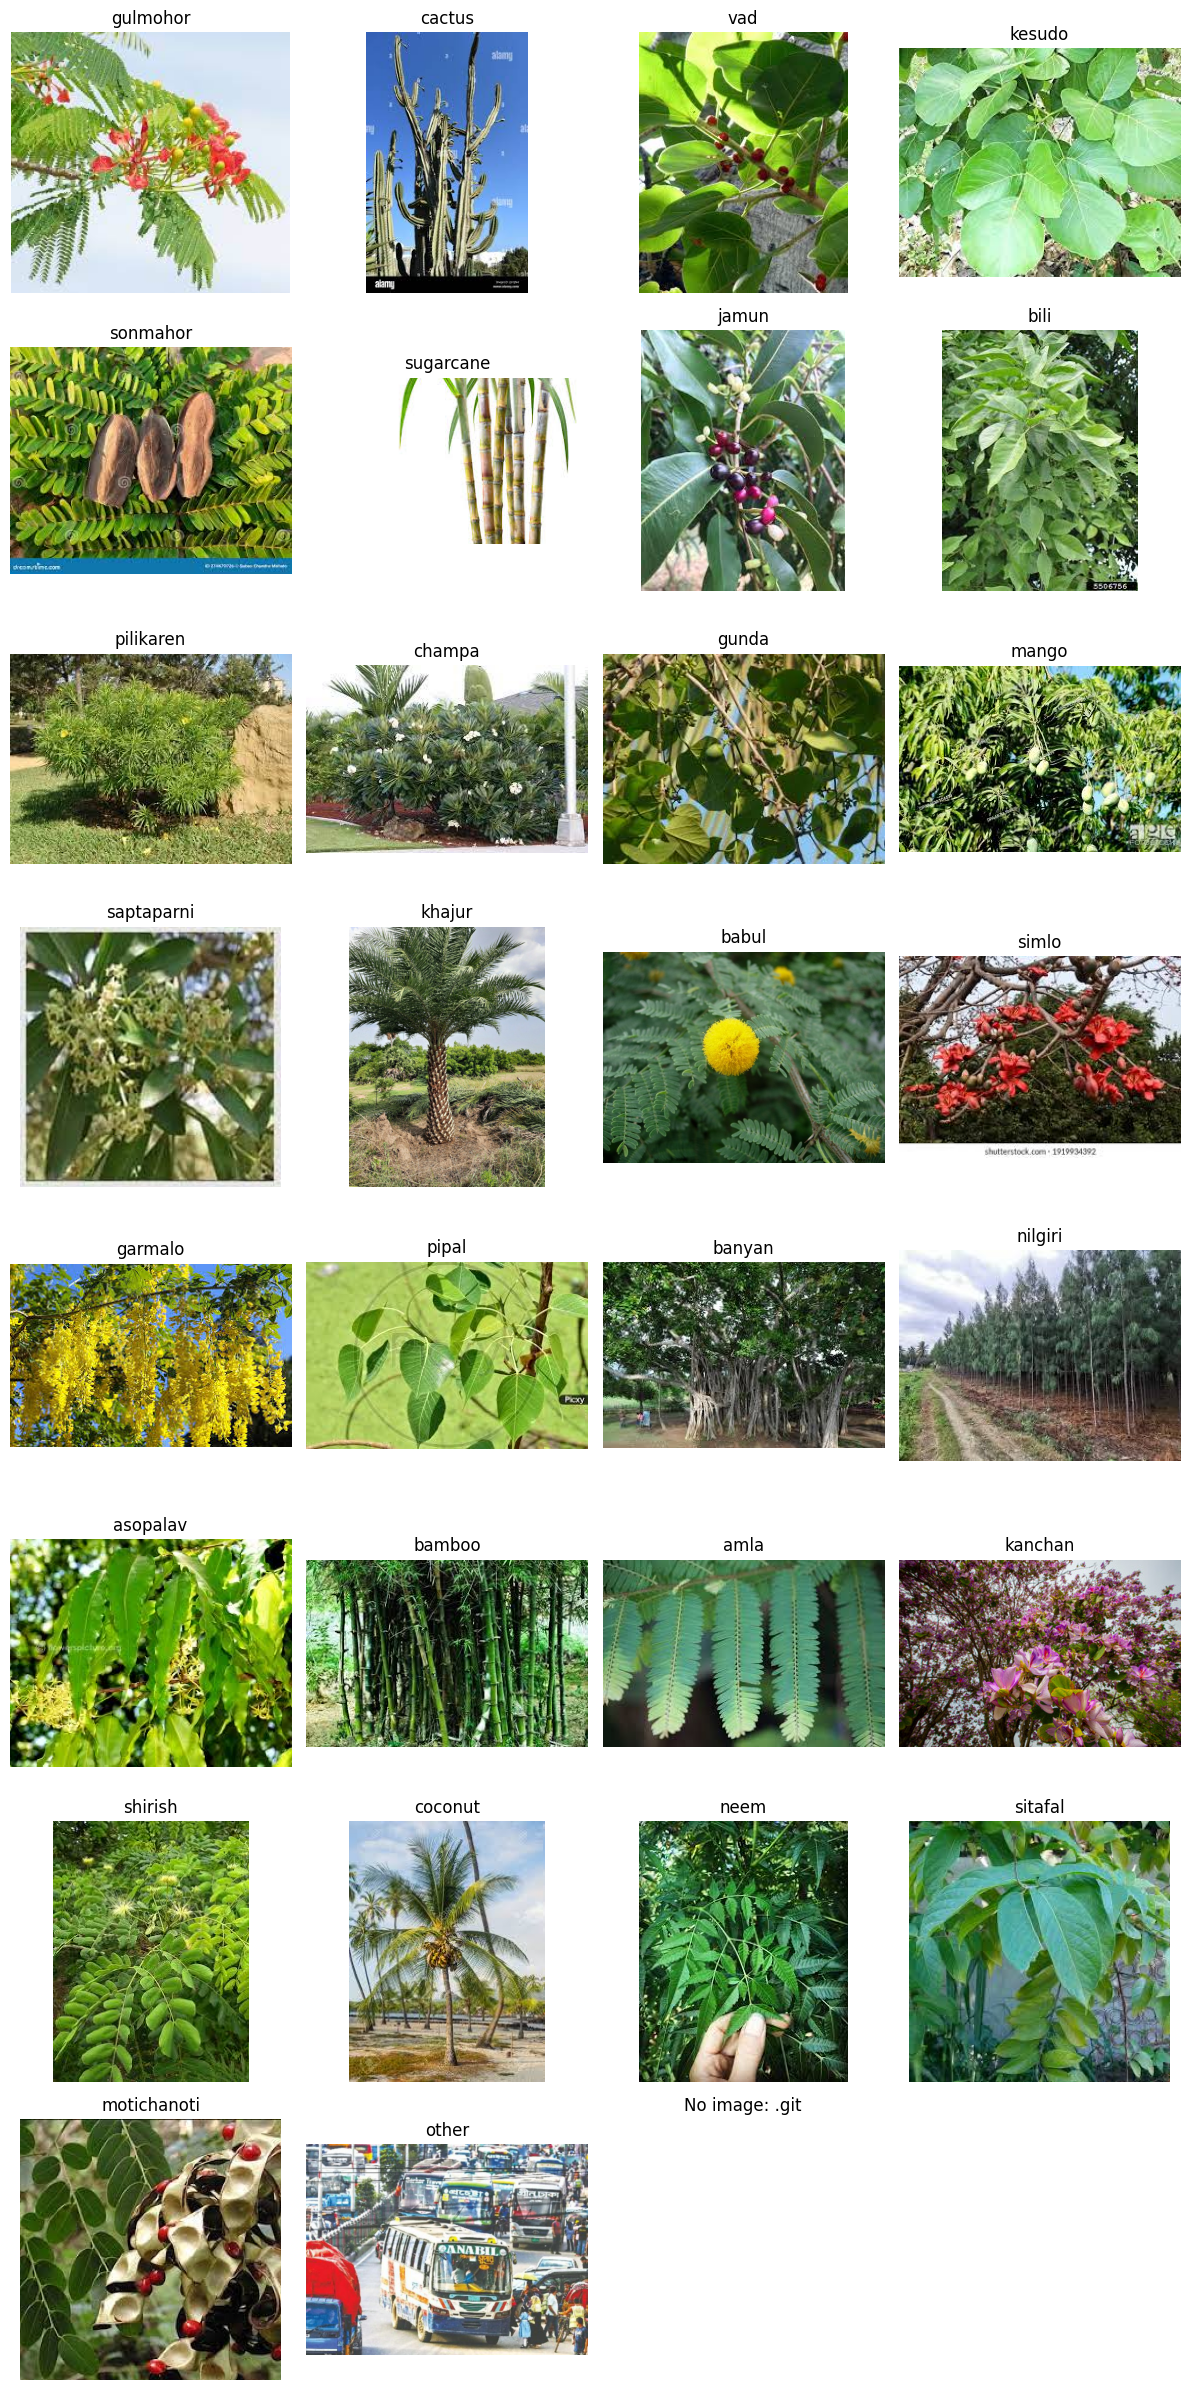

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

dataset_path = "/content/tree-species-dataset/Tree_Species_Dataset"
species_folders = [f.name for f in os.scandir(dataset_path) if f.is_dir()]
n_species = len(species_folders)
n_cols = 4
n_rows = (n_species + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
axes = axes.flatten()

for i, species_folder in enumerate(species_folders):
    folder_path = os.path.join(dataset_path, species_folder)
    image_files = [f.name for f in os.scandir(folder_path) if f.is_file() and f.name.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if image_files:
        image_path = os.path.join(folder_path, image_files[0])
        try:
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].set_title(species_folder)
            axes[i].axis('off') # Hide axes
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            axes[i].set_title(f"Error: {species_folder}")
            axes[i].axis('off')
    else:
        axes[i].set_title(f"No image: {species_folder}")
        axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [5]:
def remove_git_dir(directory):
    git_path = os.path.join(directory, '.git')
    if os.path.exists(git_path):
        print(f"Removing .git directory from {directory}")
        try:
            shutil.rmtree(git_path)
            print(f"Successfully removed {git_path}")
        except Exception as e:
            print(f"Error removing {git_path}: {e}")

remove_git_dir("/content/tree-species-dataset/Tree_Species_Dataset")


Removing .git directory from /content/tree-species-dataset/Tree_Species_Dataset
Successfully removed /content/tree-species-dataset/Tree_Species_Dataset/.git


In [6]:
image_counts = {}
for species_folder in species_folders:
    if species_folder == '.git':
        continue
    folder_path = os.path.join(dataset_path, species_folder)
    image_files = [f.name for f in os.scandir(folder_path) if f.is_file() and f.name.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_counts[species_folder] = len(image_files)

print("Number of images in each species folder:")
for folder, count in image_counts.items():
    print(f"{folder}: {count}")

Number of images in each species folder:
gulmohor: 50
cactus: 50
vad: 50
kesudo: 50
sonmahor: 50
sugarcane: 50
jamun: 50
bili: 50
pilikaren: 50
champa: 50
gunda: 50
mango: 50
saptaparni: 50
khajur: 50
babul: 50
simlo: 50
garmalo: 50
pipal: 50
banyan: 50
nilgiri: 50
asopalav: 50
bamboo: 50
amla: 50
kanchan: 50
shirish: 50
coconut: 50
neem: 50
sitafal: 50
motichanoti: 50
other: 150


In [7]:
repo_path = "/content/tree-species-dataset/Tree_Species_Dataset"
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 30


In [8]:
image_shapes = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        img = Image.open(img_path)
        image_shapes.append(img.size)

# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

Width  Height
0    232     217
1    183     275
2    225     225
3    259     194
4    225     225

In [9]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 1600


In [ ]:
print(shapes_df.describe())

             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [10]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))


Duplicate image sets found: 82


In [11]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))


Corrupted images: 0


Duplicate set 1:


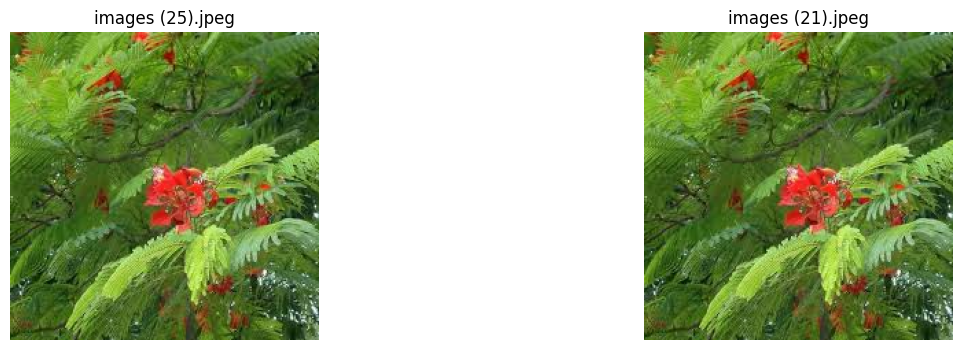

Duplicate set 2:


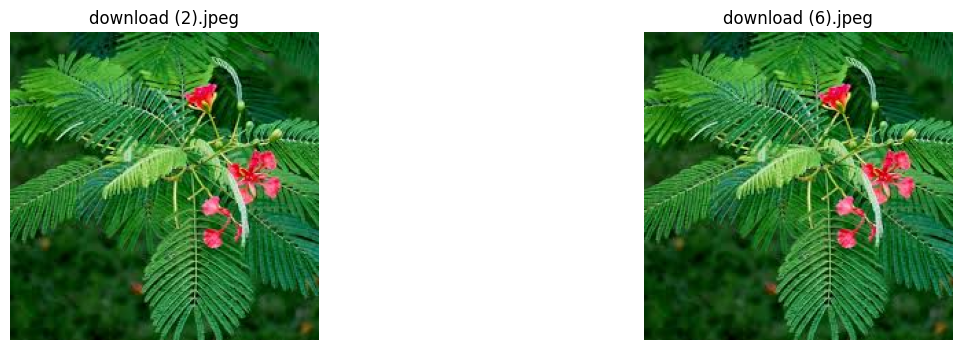

Duplicate set 3:


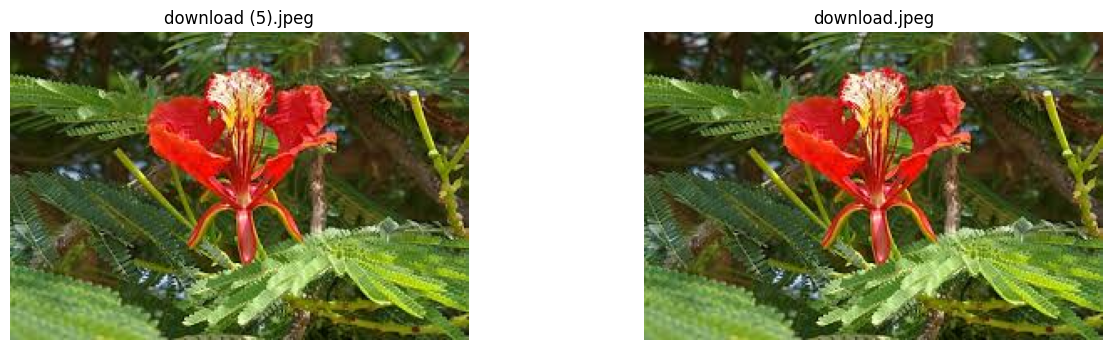

In [12]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)


In [13]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")


✅ Removed 86 duplicate images.


In [14]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")


🔻 Very small images: 20
🔺 Very large images: 40


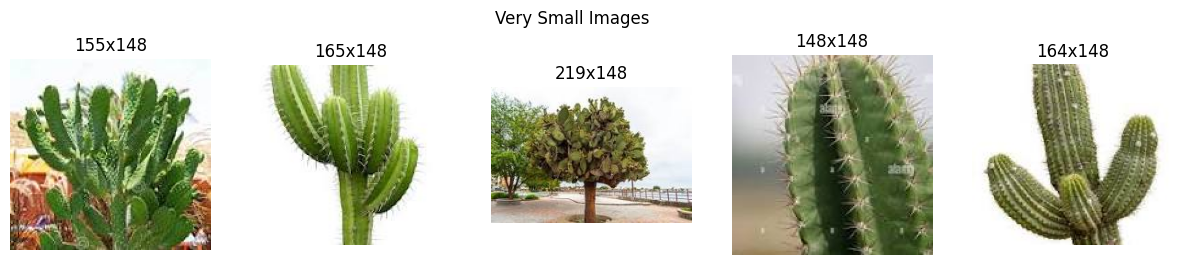

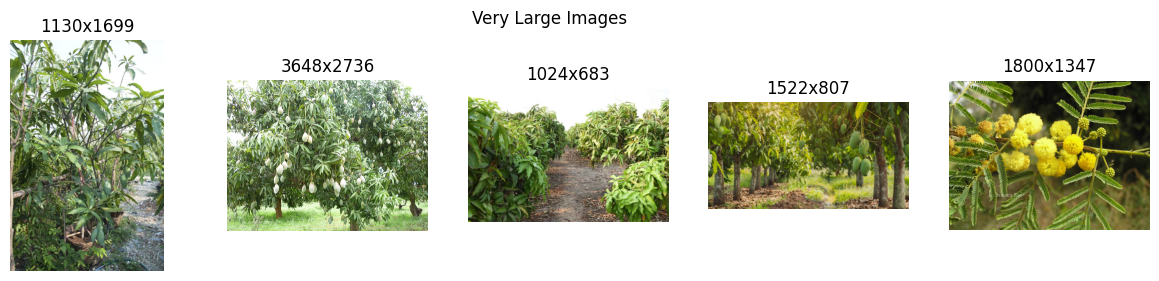

In [15]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")


In [16]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")


🗑️ Removed 60 outlier images (small + large).


In [17]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())


             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')  # For 30 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_gen, validation_data=val_gen, epochs=25)

model.save("improved_cnn_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 34s 687ms/step - accuracy: 0.0887 - loss: 5.3862 - val_accuracy: 0.0830 - val_loss: 6.2289
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 465ms/step - accuracy: 0.1002 - loss: 3.2660 - val_accuracy: 0.0903 - val_loss: 10.6711
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 509ms/step - accuracy: 0.1155 - loss: 3.1725 - val_accuracy: 0.0903 - val_loss: 12.7766
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 477ms/step - accuracy: 0.1143 - loss: 3.2013 - val_accuracy: 0.0903 - val_loss: 15.6100
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 495ms/step - accuracy: 0.1170 - loss: 3.1197 - val_accuracy: 0.0903 - val_loss: 15.1100
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 472ms/step - accuracy: 0.1515 - loss: 3.0296 - val_accuracy: 0.0939 - val_loss: 14.7444
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 496ms/step - accuracy: 0.1869 - loss: 2.9967 - val_accuracy: 0.0939 - val_loss: 14.7265
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 471ms/step - accuracy: 0.1679 - loss: 3.0582 - va

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Enable eager execution
tf.config.run_functions_eagerly(True)

# Load the previously saved model
model = load_model("/content/final_model.keras")

# Re-compile the model to re-initialize the optimizer
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training for another 30 epochs
model.fit(train_gen, validation_data=val_gen, epochs=50)

# Save the updated model in the recommended Keras format
model.save("final_model.keras")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 605ms/step - accuracy: 0.4236 - loss: 2.0248 - val_accuracy: 0.3430 - val_loss: 2.9515
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 649ms/step - accuracy: 0.4456 - loss: 1.9061 - val_accuracy: 0.3285 - val_loss: 2.8812
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 599ms/step - accuracy: 0.4315 - loss: 1.9925 - val_accuracy: 0.3755 - val_loss: 2.9512
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 592ms/step - accuracy: 0.4473 - loss: 1.9325 - val_accuracy: 0.3574 - val_loss: 2.9234
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 586ms/step - accuracy: 0.4636 - loss: 1.8780 - val_accuracy: 0.3755 - val_loss: 3.0771
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 595ms/step - accuracy: 0.4278 - loss: 2.0190 - val_accuracy: 0.3755 - val_loss: 2.9624
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 597ms/step - accuracy: 0.4613 - loss: 1.9255 - val_accuracy: 0.3791 - val_loss: 2.8314
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 625ms/step - accuracy: 0.4780 - loss: 1.8714 - val_accuracy: 0.371

KeyboardInterrupt: 

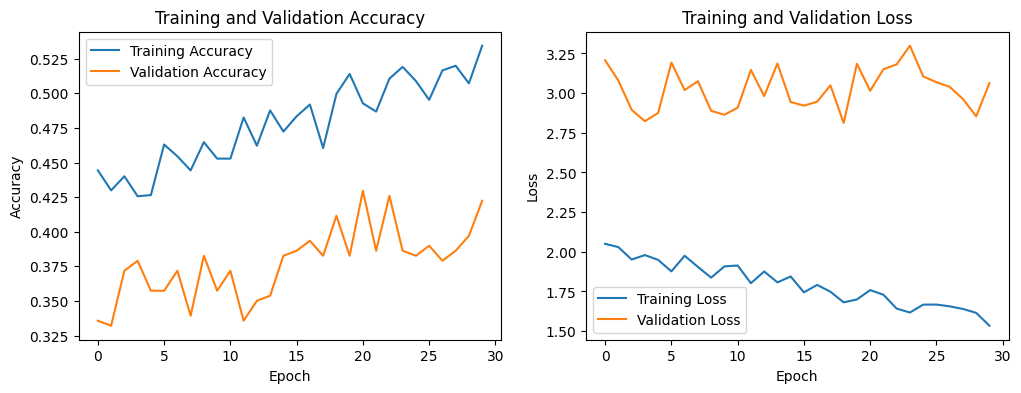

In [ ]:
import matplotlib.pyplot as plt

# Get the history from the model training
history = model.history

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
import os
import pandas as pd

repo_path = "/content/tree-species-dataset/Tree_Species_Dataset"
class_dirs = os.listdir(repo_path)

# Recalculate counts
image_counts = {}
for species_folder in class_dirs:
    if not os.path.isdir(os.path.join(repo_path, species_folder)):
        continue
    folder_path = os.path.join(repo_path, species_folder)
    image_files = [f.name for f in os.scandir(folder_path) if f.is_file() and f.name.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_counts[species_folder] = len(image_files)

# Display as a DataFrame
counts_df = pd.DataFrame(list(image_counts.items()), columns=['Class', 'Count'])
print("Image counts per class after cleaning:")
print(counts_df)

Image counts per class after cleaning:
          Class  Count
0      gulmohor     43
1        cactus     40
2           vad     49
3        kesudo     40
4      sonmahor     49
5     sugarcane     50
6         jamun     46
7          bili     44
8     pilikaren     46
9        champa     46
10        gunda     49
11        mango     44
12   saptaparni     49
13       khajur     49
14        babul     45
15        simlo     36
16      garmalo     42
17        pipal     46
18       banyan     49
19      nilgiri     44
20     asopalav     44
21       bamboo     50
22         amla     44
23      kanchan     47
24      shirish     49
25      coconut     49
26         neem     50
27      sitafal     44
28  motichanoti     46
29        other    125


In [30]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras import layers, models, optimizers, callbacks
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# === CONFIG ===
NUM_CLASSES = 30
IMG_SHAPE = (224, 224, 3)
EPOCHS_PHASE1 = 10
EPOCHS_PHASE2 = 15

# === Assuming you already have train_gen and val_gen ready ===
# They should be preprocessed, batched, and one-hot encoded (e.g., using flow_from_directory(..., class_mode='categorical'))

# === Safe label extraction ===
def extract_labels_safe(generator, max_batches=100):
    labels = []
    batches_processed = 0
    for _, y in generator:
        labels.extend(np.argmax(y, axis=1))  # Convert one-hot to class index
        batches_processed += 1
        if batches_processed >= max_batches:
            break
    return np.array(labels)

train_labels = extract_labels_safe(train_gen, max_batches=100)

# === Compute class weights ===
class_weights_array = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_labels),
    y=train_labels
)
class_weight_dict = dict(enumerate(class_weights_array))
print("Class weights:", class_weight_dict)

# === Base Model ===
base_model = EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=IMG_SHAPE,
    pooling='avg'
)
base_model.trainable = False  # Phase 1: freeze base

# === Classifier Head ===
x = layers.BatchNormalization()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)

# === Callbacks ===
early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.3, patience=2)

# === Compile Phase 1 ===
model.compile(
    optimizer=optimizers.Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === Train Phase 1 ===
print("\n--- Phase 1: Train classifier head only ---\n")
model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_PHASE1,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight_dict,
    verbose=1
)

# === Unfreeze base model for fine-tuning ===
base_model.trainable = True

# === Compile Phase 2 ===
model.compile(
    optimizer=optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === Train Phase 2 ===
print("\n--- Phase 2: Fine-tune whole model ---\n")
model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_PHASE2,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight_dict,
    verbose=1
)

# === Save model ===
model.save("efficientnetv2b0_finetuned_30class.h5")


Class weights: {0: np.float64(1.083673469387755), 1: np.float64(1.0514851485148515), 2: np.float64(1.10625), 3: np.float64(0.9743119266055046), 4: np.float64(0.9654545454545455), 5: np.float64(1.2068181818181818), 6: np.float64(1.3111111111111111), 7: np.float64(1.0514851485148515), 8: np.float64(0.9654545454545455), 9: np.float64(1.10625), 10: np.float64(1.1419354838709677), 11: np.float64(0.9567567567567568), 12: np.float64(1.1297872340425532), 13: np.float64(1.0310679611650486), 14: np.float64(1.2206896551724138), 15: np.float64(1.021153846153846), 16: np.float64(1.021153846153846), 17: np.float64(1.083673469387755), 18: np.float64(0.9482142857142857), 19: np.float64(1.0948453608247424), 20: np.float64(0.39044117647058824), 21: np.float64(1.0514851485148515), 22: np.float64(1.0411764705882354), 23: np.float64(0.9654545454545455), 24: np.float64(0.9482142857142857), 25: np.float64(1.3443037974683545), 26: np.float64(1.1297872340425532), 27: np.float64(0.9833333333333333), 28: np.floa

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Copy dataset to drive
!cp -r /content/tree-species-dataset /content/drive/MyDrive/

# Copy model to drive
!cp improved_cnn_model.h5 /content/drive/MyDrive/

# Task
Use resnet or mobilenetv3 model to check which is best.

## Build and train resnet50v2 model

### Subtask:
Create and train a ResNet50V2 model on the dataset.


**Reasoning**:
Import necessary libraries and define parameters for the ResNet50V2 model training, then load train and validation generators.



In [34]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import layers, models, optimizers, callbacks
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Enable eager execution if needed, although tf.data pipeline execution is not affected
tf.config.run_functions_eagerly(True)

# === CONFIG ===
NUM_CLASSES = 30
IMG_SHAPE = (224, 224, 3)
EPOCHS_PHASE1 = 10
EPOCHS_PHASE2 = 15

# Define the base path to the dataset
repo_path = "/content/tree-species-dataset/Tree_Species_Dataset"

# Re-create data generators if they were interrupted
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_SHAPE[0], IMG_SHAPE[1]),
    batch_size=32, # Assuming BATCH_SIZE variable is available from previous steps
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_SHAPE[0], IMG_SHAPE[1]),
    batch_size=32, # Assuming BATCH_SIZE variable is available from previous steps
    class_mode='categorical',
    subset='validation'
)

# === Safe label extraction ===
def extract_labels_safe(generator, max_batches=100):
    labels = []
    batches_processed = 0
    for _, y in generator:
        labels.extend(np.argmax(y, axis=1))  # Convert one-hot to class index
        batches_processed += 1
        if batches_processed >= max_batches:
            break
    return np.array(labels)

train_labels = extract_labels_safe(train_gen, max_batches=100)

# === Compute class weights ===
class_weights_array = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_labels),
    y=train_labels
)
class_weight_dict = dict(enumerate(class_weights_array))
print("Class weights:", class_weight_dict)

Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.
Class weights: {0: np.float64(1.1419354838709677), 1: np.float64(1.0727272727272728), 2: np.float64(1.0514851485148515), 3: np.float64(1.0018867924528303), 4: np.float64(0.9567567567567568), 5: np.float64(1.0727272727272728), 6: np.float64(1.18), 7: np.float64(1.0310679611650486), 8: np.float64(0.9315789473684211), 9: np.float64(1.1543478260869566), 10: np.float64(1.167032967032967), 11: np.float64(1.021153846153846), 12: np.float64(1.062), 13: np.float64(1.0411764705882354), 14: np.float64(1.193258426966292), 15: np.float64(1.021153846153846), 16: np.float64(1.083673469387755), 17: np.float64(1.0411764705882354), 18: np.float64(0.9398230088495575), 19: np.float64(1.1178947368421053), 20: np.float64(0.3918819188191882), 21: np.float64(1.0514851485148515), 22: np.float64(1.10625), 23: np.float64(0.9654545454545455), 24: np.float64(0.9833333333333333), 25: np.float64(1.3111111111111111), 26: np.float64(1

**Reasoning**:
Now that the data generators and class weights are set up, I will define and compile the ResNet50V2 model for the first phase of training, where only the classifier head is trained. This involves creating the base model, adding a new classifier head, compiling the model with appropriate settings, and then initiating the training process. This single code block will cover steps 2 through 7 from the instructions.



In [35]:
# === Base Model (ResNet50V2) ===
base_model = ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=IMG_SHAPE,
    pooling='avg'
)
base_model.trainable = False  # Freeze the base model for Phase 1

# === Classifier Head ===
x = layers.BatchNormalization()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)

# === Callbacks ===
early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.3, patience=2)

# === Compile Phase 1 ===
model.compile(
    optimizer=optimizers.Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === Train Phase 1 ===
print("\n--- Phase 1: Train classifier head only ---\n")
history_phase1 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_PHASE1,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight_dict,
    verbose=1
)

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Phase 1: Train classifier head only ---



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


37/37 ━━━━━━━━━━━━━━━━━━━━ 34s 892ms/step - accuracy: 0.1142 - loss: 3.6403 - val_accuracy: 0.3394 - val_loss: 2.5813 - learning_rate: 0.0010
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 38s 848ms/step - accuracy: 0.3779 - loss: 2.3428 - val_accuracy: 0.4513 - val_loss: 2.1045 - learning_rate: 0.0010
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 815ms/step - accuracy: 0.5027 - loss: 1.9339 - val_accuracy: 0.4621 - val_loss: 1.8802 - learning_rate: 0.0010
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 36s 979ms/step - accuracy: 0.5650 - loss: 1.5502 - val_accuracy: 0.5199 - val_loss: 1.7278 - learning_rate: 0.0010
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 841ms/step - accuracy: 0.5796 - loss: 1.4860 - val_accuracy: 0.5560 - val_loss: 1.5721 - learning_rate: 0.0010
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 840ms/step - accuracy: 0.6262 - loss: 1.2878 - val_accuracy: 0.5632 - val_loss: 1.5945 - learning_rate: 0.0010
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 822ms/step - accuracy: 0.6480 - loss: 1.1904 - val_

**Reasoning**:
Phase 1 of the training is complete. Now, I will proceed with Phase 2, which involves fine-tuning the entire model. This requires unfreezing the base model, recompiling it with a much lower learning rate, and then continuing the training. This single code block will cover steps 8 through 11.



In [37]:
# === Unfreeze base model for fine-tuning ===
base_model.trainable = True

# === Compile Phase 2 ===
model.compile(
    optimizer=optimizers.Adam(1e-5),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === Train Phase 2 ===
print("\n--- Phase 2: Fine-tune whole model ---\n")
history_phase2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_PHASE2,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight_dict,
    verbose=1
)

# === Save model ===
model.save("resnet50v2_finetuned_30class.keras")
print("\n--- Model saved successfully as resnet50v2_finetuned_30class.keras ---")


--- Phase 2: Fine-tune whole model ---

Epoch 1/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.5705 - loss: 1.5680 - val_accuracy: 0.5957 - val_loss: 1.6145 - learning_rate: 1.0000e-05
Epoch 2/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.5740 - loss: 1.5927 - val_accuracy: 0.5560 - val_loss: 1.5978 - learning_rate: 1.0000e-05
Epoch 3/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.6047 - loss: 1.4128 - val_accuracy: 0.6065 - val_loss: 1.5050 - learning_rate: 1.0000e-05
Epoch 4/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6266 - loss: 1.2757 - val_accuracy: 0.5884 - val_loss: 1.4901 - learning_rate: 1.0000e-05
Epoch 5/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.6206 - loss: 1.2523 - val_accuracy: 0.6029 - val_loss: 1.5151 - learning_rate: 1.0000e-05
Epoch 6/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.6559 - loss: 1.2146 - val_accuracy: 0.6390 - val_loss: 1.4380 - learning_rate: 1.0000e-05
Epoch 7/15
37/37 ━━━━━━━━━━━━━━━━━━

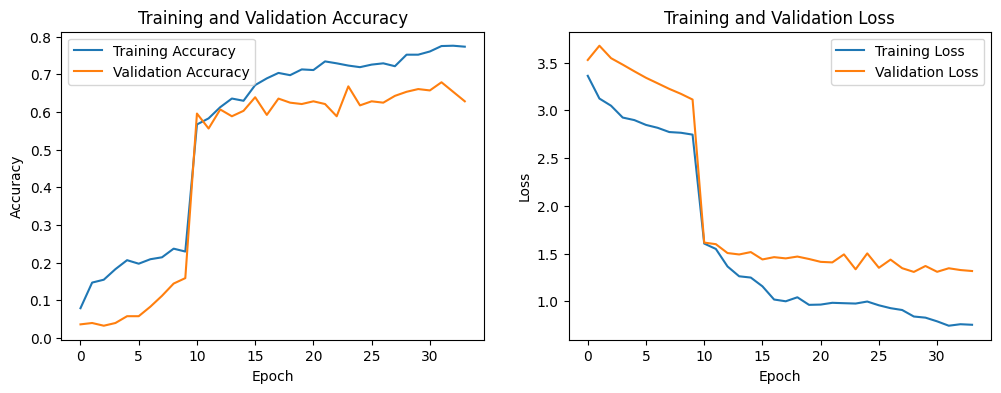

In [42]:
import matplotlib.pyplot as plt

# Combine the history objects
full_history = {
    'accuracy': history_phase1.history['accuracy'] + history_phase2.history['accuracy'] + history_phase3.history['accuracy'],
    'val_accuracy': history_phase1.history['val_accuracy'] + history_phase2.history['val_accuracy'] + history_phase3.history['val_accuracy'],
    'loss': history_phase1.history['loss'] + history_phase2.history['loss'] + history_phase3.history['loss'],
    'val_loss': history_phase1.history['val_loss'] + history_phase2.history['val_loss'] + history_phase3.history['val_loss']
}

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(full_history['accuracy'], label='Training Accuracy')
plt.plot(full_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(full_history['loss'], label='Training Loss')
plt.plot(full_history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [39]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load the previously saved model
model = load_model("resnet50v2_finetuned_30class.keras")

# Re-compile the model to re-initialize the optimizer
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training for another 25 epochs
history_phase3 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=25,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight_dict,
    verbose=1
)

# Save the updated model
model.save("resnet50v2_finetuned_30class_v2.keras")

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


37/37 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.7195 - loss: 0.9488 - val_accuracy: 0.6282 - val_loss: 1.3506 - learning_rate: 1.0000e-05
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7042 - loss: 0.9771 - val_accuracy: 0.6245 - val_loss: 1.4361 - learning_rate: 1.0000e-05
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.7096 - loss: 0.9348 - val_accuracy: 0.6426 - val_loss: 1.3462 - learning_rate: 1.0000e-05
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.7371 - loss: 0.9023 - val_accuracy: 0.6534 - val_loss: 1.3073 - learning_rate: 1.0000e-05
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.7409 - loss: 0.8575 - val_accuracy: 0.6606 - val_loss: 1.3693 - learning_rate: 1.0000e-05
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.7410 - loss: 0.8024 - val_accuracy: 0.6570 - val_loss: 1.3085 - learning_rate: 1.0000e-05
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.7443 - loss: 0.8118 - v

In [40]:
# Create a data generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = val_gen

# Evaluate the model on the test data
evaluation = model.evaluate(test_generator)

# Print the accuracy and loss
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")
print(f"Test Loss: {evaluation[0]:.4f}")

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 460ms/step - accuracy: 0.6331 - loss: 1.5218
Test Accuracy: 65.34%
Test Loss: 1.3982
